# Title: "Breast Cancer Prediction from Data"



## Problem 

The objective of the breast cancer study is to build a predictive model that will help us in predicting the diagnosis the breast cancer as Malignant or Benign accurately with the most important feature data points. 

In order to predict, approach is to determine the significance of the features characterstics; the radius, smoothness, compactness etc. of the distribution of cells), while the output as binary categories, i.e., benign or malign.

The purpose is to execute strategies such as feature reduction, feature scaling by standardization, decision trees , applying Machine learning models & apply a binary classification algorithm and iterate the process, until performance saturates.



## Data Description
The dataset has 569 rows and 33 columns. Amongst the 33 columns, the first two are ID number and Diagnonsis (M=malignant, B = benign). And the last column is an unnamed column with only NaN values, so it is removed right away. The other 30 columns correspond to mean, standard deviation and the largest values (points on the tails) of the distributions of the following 10 features computed for the cell nuclei;
### data.csv

1. ID number
2. radius (mean of distances from center to points on the perimeter)
3. texture (standard deviation of gray-scale values)
4. perimeter
5. area
6. smoothness (local variation in radius lengths)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
8. symmetry
10. fractal dimension ("coastline approximation" - 1)

All feature values are recorded with four significant digits. The class distribution of the samples is such that 357 are benign and 212 are malignant, which is imbalanced, but not so bad.
Note: Mean, Standard Error (SE) and Worst (mean of the three largest values) of these features are obtained from each image, resulting in 30 features.

## Importing the Libraries

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from dtreeviz.trees import *
from IPython.display import Image, display_svg
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout





## Read CSV file data

In [60]:

df = pd.read_csv('Resources/data.csv',  index_col=False) 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
## Count the missing values in each column
df.isnull().sum()



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [62]:
## Count the NaN values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [63]:
#  Count the missing values in each row
df.isnull().sum(axis=1).head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

## Exploratory Data Analysis (EDA)

In [64]:
def dataSetAnalysis(df):
    
    #Display the dimensions of the data set using the panda dataset ‘shape’ attribute.
    print("Breast Cancer data set dimensions : {}".format(df.shape))
    
    #Dsiplay starting values of data set
    print("Dataset Head")
    print(df.head(3))
    print("=" * 30)
    
    # Display List of Columns/Features in the Dataset
    print("Dataset Features")
    print(df.columns.values)
    #print(list(df))
    print("=" * 30)
    
    # Display How many samples and how many missing values for each feature
    print("Dataset Features Details")
    print(df.info())
    print("=" * 30)
    
    # Display distribution of numerical features across the data set
    print("Dataset Numerical Features")
    print(df.describe())
    print("=" * 30)
    
    # Display distribution of categorical features across the data set
    print("Dataset Categorical Features")
    print(df.describe(include=['O']))
    print("=" * 30)
    
dataSetAnalysis(df)

Breast Cancer data set dimensions : (569, 33)
Dataset Head
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33            184.6      2019.0            0.1622   
1     ...               23.41            158.8      1956.0            0.1238   
2     ...               25.53            152.5      1709.0            0.144

## Clean Dataset - Let's determine the values of y and x axes

In [65]:
#[all rows, col from index 2 to the last one which excludes 'id' & Unnamed: 32' columns]
X = df.iloc[:,2:32] 
#X
#[all rows, 'diagnosis' column only which contains the classes of the cancer]
y = df.iloc[:,1] 
#y

## Normalization
Normalization rescales the values into a range of [0,1]. This might be useful in some cases where all parameters need to have the same positive scale. However, the outliers from the data set are lost. Because if some of our columns have very high values, they will suppress other columns and do not show much.

### FORMULA:

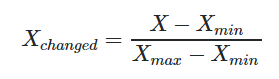


In [66]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


##  Label Encoder

Convert categorical data, or text data, into numbers using SciKit Learn Label Encoder library in Python, which our predictive models can better understand.

Convert  'diagnosis'  'M' or 'B' to  Malignant or Benign, encoding them to 0 and 1.



In [67]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
print("Before encoding: ")
#print(y)
print(y[100:110])
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(y)
print("\nAfter encoding: ")
Y

Before encoding: 
100    M
101    B
102    B
103    B
104    B
105    M
106    B
107    B
108    M
109    B
Name: diagnosis, dtype: object

After encoding: 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Splitting Dataset
Split our data into training and testing datasets. The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [68]:
from sklearn.model_selection import train_test_split
# Split dataset into training (80%) and test (20%) set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
 
# Normalize training data & test data
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_train.mean())/(X_test.max()-X_test.min())

## FEATURE SCALING

Scaling ensures that just because some features are big, the model won't lead to using them as a main predictor.
Dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.

We will use StandardScaler method from SciKit-Learn library.

## STANDARDIZATION 
Standardization rescales data to have a mean (μ) of 0 and standard deviation (σ) of 1 (unit variance). In other words, Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### FORMULA:
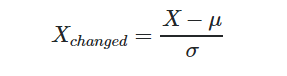

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## XGBOOST for Applied Machine Learning

In [70]:
#Using xgboost Algorithm to the Training Set
from xgboost import XGBClassifier
XGB_Model = XGBClassifier()
XGB_Model.fit(X_train,Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [71]:
XGB_y_pred = XGB_Model.predict(X_test)
XGB_predictions = [round(value) for value in XGB_y_pred]
XGB_accuracy = accuracy_score(Y_test, XGB_predictions)
print("xgboost Accuracy: %.2f%%" % (XGB_accuracy * 100.0))

xgboost Accuracy: 97.37%


## LOGISTIC REGRESSION for Applied Machine Learning

In [72]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression(random_state = 0)
LRModel.fit(X_train, Y_train)



C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
LR_y_pred = LRModel.predict(X_test)
LR_predictions = [round(value) for value in LR_y_pred]
LR_accuracy = accuracy_score(Y_test, LR_predictions)
print("Logistic Regression Accuracy: %.2f%%" % (LR_accuracy * 100.0))


Logistic Regression Accuracy: 96.49%


## SUPPORT VECTOR MACHINE for Applied Machine Learning

In [74]:
#Using SVC method of svm class to use Support Vector Machine Algorithm

from sklearn.svm import SVC
SVM_Model = SVC(kernel = 'linear', random_state = 0)
SVM_Model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
SVM_y_pred = SVM_Model.predict(X_test)
SVM_predictions = [round(value) for value in SVM_y_pred]
SVM_accuracy = accuracy_score(Y_test, SVM_predictions)
print("Support Vector Machine Accuracy: %.2f%%" % (SVM_accuracy * 100.0))

Support Vector Machine Accuracy: 98.25%


## SVM KERNEL for Applied Machine Learning

In [76]:
#Using SVC method of svm class to use Kernel SVM Algorithm

from sklearn.svm import SVC
KSV_Model = SVC(kernel = 'rbf', random_state = 0)
KSV_Model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
KSV_y_pred = KSV_Model.predict(X_test)
KSV_predictions = [round(value) for value in KSV_y_pred]
KSV_accuracy = accuracy_score(Y_test,KSV_predictions)
print("Kernel SVM Accuracy: %.2f%%" % (KSV_accuracy * 100.0))

Kernel SVM Accuracy: 98.25%


## NAIVE BAYES for Applied Machine Learning

In [78]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
GNB_Model = GaussianNB()
GNB_Model.fit(X_train, Y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
GNB_y_pred = GNB_Model.predict(X_test)
GNB_predictions = [round(value) for value in GNB_y_pred]
GNB_accuracy = accuracy_score(Y_test,GNB_predictions)
print("Naïve Bayes Accuracy: %.2f%%" % (GNB_accuracy * 100.0))

Naïve Bayes Accuracy: 90.35%


## DECISION TREE for Applied Machine Learning

In [80]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_Model.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [81]:
DT_y_pred = DT_Model.predict(X_test)
DT_predictions = [round(value) for value in DT_y_pred]
DT_accuracy = accuracy_score(Y_test,DT_predictions)
print("Decision Tree Accuracy: %.2f%%" % (DT_accuracy * 100.0))

Decision Tree Accuracy: 92.98%


## RANDOM FOREST for Applied Machine Learning

In [82]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_Model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
RF_y_pred = RF_Model.predict(X_test)
RF_predictions = [round(value) for value in RF_y_pred]
RF_accuracy = accuracy_score(Y_test,RF_predictions)
print("Random Forest Accuracy: %.2f%%" % (RF_accuracy * 100.0))

Random Forest Accuracy: 97.37%


## K NEIGHBORS for Applied Machine Learning

In [84]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
KN_Model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KN_Model.fit(X_train, Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [85]:
KN_y_pred = KN_Model.predict(X_test)
KN_predictions = [round(value) for value in KN_y_pred]
KN_accuracy = accuracy_score(Y_test, KN_predictions)
print("Nearest Neighbor Accuracy: %.2f%%" % (LR_accuracy * 100.0))

Nearest Neighbor Accuracy: 96.49%


## APPLYING RANDOM FOREST MODEL INTO CONFUSION MATRIX

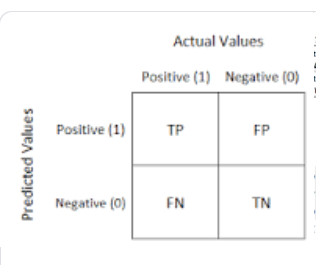


Confusion matrix, without normalization
[[66  1]
 [ 2 45]]


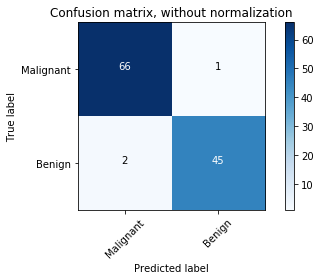

Normalized confusion matrix
[[0.98507463 0.01492537]
 [0.04255319 0.95744681]]


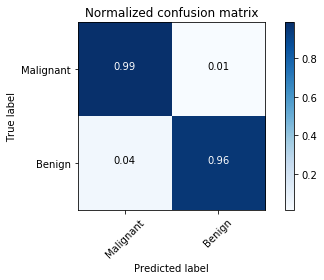

In [86]:
###### Confusion Matrix using Random Forest Model

Y_pred = RF_Model.predict(X_test)
Y_pred

####generic code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools



class_names=["Malignant", "Benign"]

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
   """
   This function prints and plots the confusion matrix.
   Normalization can be applied by setting `normalize=True`.
   """
   if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
   else:
       print('Confusion matrix, without normalization')

   print(cm)

   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)

   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

   plt.ylabel('True label')
   plt.xlabel('Predicted label')
   plt.tight_layout()

#cnf_matrix = confusion_matrix(Y_test, predictions)
cnf_matrix =confusion_matrix(Y_test, Y_pred)
cnf_matrix

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                     title='Confusion matrix, without normalization')

plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                     title='Normalized confusion matrix')

plt.show()
#Message Input
#Message #class-exercises

## CONFUSION MATRIX ANALYSIS


For the above confusion matrix, we can see that the false positive = 0 and the false negative = 1. Let me remind you what does it mean.

False positives (FP): We predicted yes, but they don't actually have the malignant cancer.
False negatives (FN): We predicted no, but they actually do have the malignant cancer.
FP is the most important indicator. To illustrate, if there is a value in FP, it means that the patient with benign cancer predicted as malignant cancer. It is very dangerous, because the patient will have the serious treatment, consume a high-dose drug category, or have a serious surgery that is actually not appropriate for such patient. If the cancer is identified as malignant, there is a sort amount of time or even no time to re-evaluate the patient, and the wrong treatment will be taken by the doctor and make the patient in danger.

In contrast, a value in FN is the number of malignant patient, who are predicted as benign. There is a time to re-assess the patient in order to provide better treatment. Clearly, this not severe as the opposite situation.

Because the FP is one and FN is very small (2). The predictive model using Random Forest does very well.

## Accuracies for different classification models:

### 1. xgboost Accuracy: 97.37%
### 2. Logistic Regression Accuracy: 96.49%
### 3. Support Vector Machine Accuracy: 98.25%
### 4. Kernel SVM Accuracy: 98.25%
### 5. Naïve Bayes Accuracy: 90.35%
### 6. Decision Tree Accuracy: 92.98%
### 7. Random Forest Accuracy: 97.37%
### 8. Nearest Neighbor Accuracy: 96.49%



## Decision tree visualization


accuracy on training set: 1.000000

accuracy on test set: 0.916084

accuracy on training set 01: 0.990610

accuracy on test set 01: 0.937063


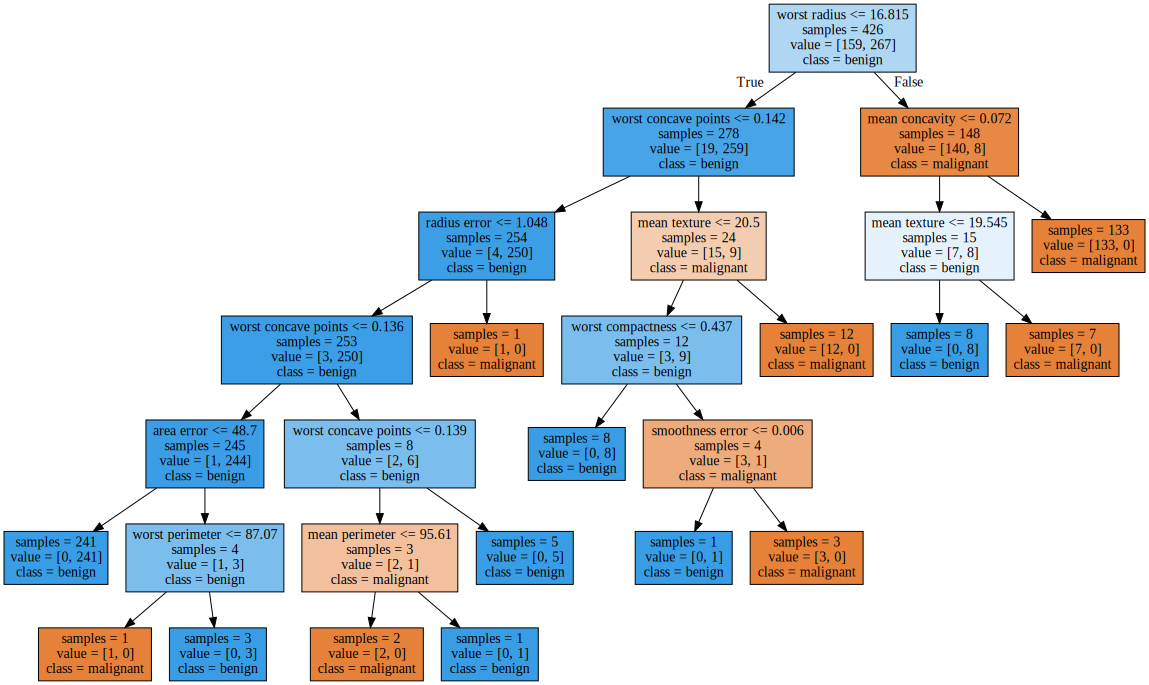

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=2017)
tree=DecisionTreeClassifier(random_state=0)

###Decision trees in scikit-learn are implemented in the DecisionTreeRegressor 
##and DecisionTreeClassifier classes. Scikit-learn only implements pre-pruning, not post- pruning.
tree.fit(X_train,y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print('\n'"accuracy on test set: %f" % tree.score(X_test, y_test))
 

###apply pre-pruning to the tree, which will stop developing the tree before we
### perfectly fit to the training data.
tree01=DecisionTreeClassifier(max_depth=4,random_state=0)
tree01.fit(X_train,y_train)
print('\n'"accuracy on training set 01: %f" % tree01.score(X_train, y_train))
print('\n'"accuracy on test set 01: %f" % tree01.score(X_test, y_test))
 
 
###visualize and analyze the tree model###
###build a file to visualize 
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="mytree.dot",class_names=['malignant',"benign"],
    feature_names=cancer.feature_names,impurity=False,filled=True)

###visualize the .dot file. Need to install graphviz seperately at first 
import graphviz
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

## Decision Tree Visualization using dtreeviz

Classification tree on Breast Cancer Data: sklearn.datasets.load_breast_cancer

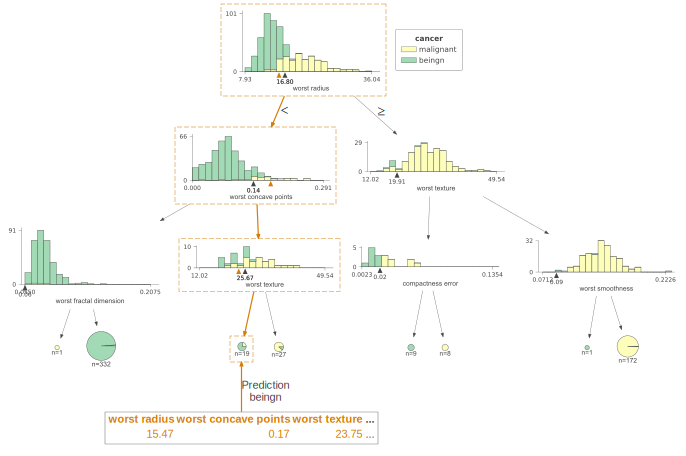

In [88]:
from sklearn.datasets import load_breast_cancer
clf = DecisionTreeClassifier(max_depth=3, random_state=666)
cancer = load_breast_cancer()
X_train = cancer.data
y_train = cancer.target

clf.fit(X_train, y_train)

X = X_train[np.random.randint(0, len(cancer)),:]

viz = dtreeviz(clf, X_train, y_train, target_name='cancer',
                  feature_names=cancer.feature_names,
                  class_names=["malignant", "beingn"],
                  fancy=True,
                  X=X,
                  orientation="TD"
              )
viz


## Decision Tree Visualization using dtreeviz

Classification tree on Breast Cancer Data CSV file

Let's see visualziations on the classic multi-class Breast Cancer Dataset. It's required to pass the class_names argument for classification trees. This is required to match the legend lables with right category codes of class. The order of labels should be in sequence of class categories.

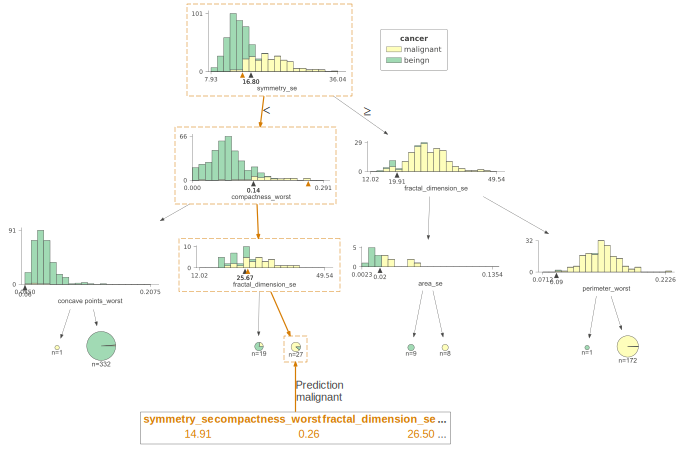

In [89]:
clf = DecisionTreeClassifier(max_depth=3, random_state=666)

clf.fit(X_train, y_train)

X = X_train[np.random.randint(0, len(cancer)),:]

viz = dtreeviz(clf, X_train, y_train, target_name='cancer',
                  feature_names=df.columns.values,
                  class_names=["malignant", "beingn"],
                  fancy=True,
                  X=X,
                  orientation="TD"
              )
viz

In [90]:
X = df.iloc[:,2:32] 
#[all rows, 'diagnosis' column only which contains the classes of the cancer]
y = df.iloc[:,1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

## Stochastic gradient descent (SGD)

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.

In [91]:
from sklearn.linear_model import SGDClassifier
import time
start = time.time()

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 74.56%
Cross validation score: 78.63% (+/- 35.54%)
Execution time: 0.01895 seconds 



C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:18

## Plotting Learning Curves
On the left side the learning curve of a naive Bayes classifier is shown for the digits dataset. Note that the training score and the cross-validation score are both not very good at the end. However, the shape of the curve can be found in more complex datasets very often: the training score is very high at the beginning and decreases and the cross-validation score is very low at the beginning and increases. On the right side we see the learning curve of an SVM with RBF kernel. We can see clearly that the training score is still around the maximum and the validation score could be increased with more training samples.

Automatically created module for IPython interactive environment


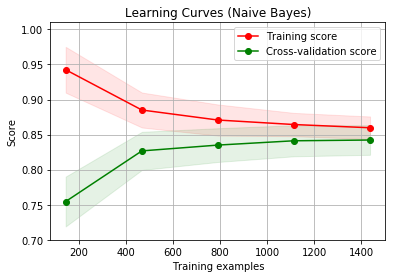

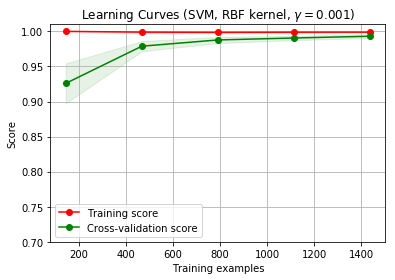

In [92]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()


## What is Deep learning?
Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost. It is the key to voice control in consumer devices like phones, tablets, TVs, and hands-free speakers.

## What are artificial neural networks?
An artificial neuron network (ANN) is a computational model in which information that flows through the network affects the structure of the ANN because a neural network changes based on the input and output. ANNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. ANN is also known as a neural network.

A single neuron is known as a perceptron. It consists of a layer of inputs(corresponds to columns of a dataframe). Each input has a weight which controls the magnitude of an input.
The summation of the products of these input values and weights is fed to the activation function. Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable. 

The main purpose is to introduce non-linear properties & convert a input signal of a node in a ANN to an output signal. That output signal now is used as a input in the next layer in the stack.  Specifically in ANN we do the sum of products of inputs(X) and their corresponding Weights(W) and apply a Activation function f(x) to it to get the output of that layer and feed it as an input to the next layer.

(https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Single-Perceptron.png">


The **ReLU** function is f(x)=max(0,x). Usually this is applied element-wise to the output of some other function, such as a matrix-vector product. In MLP usages, rectifier units replace all other activation functions except perhaps the readout layer. But I suppose you could mix-and-match them if you'd like. One way ReLUs improve neural networks is by speeding up training. The gradient computation is very simple (either 0 or 1 depending on the sign of x). Also, the computational step of a ReLU is easy: any negative elements are set to 0.0 -- no exponentials, no multiplication or division operations. Gradients of logistic and hyperbolic tangent networks are smaller than the positive portion of the ReLU. This means that the positive portion is updated more rapidly as training progresses. However, this comes at a cost. The 0 gradient on the left-hand side is has its own problem, called "dead neurons," in which a gradient update sets the incoming values to a ReLU such that the output is always zero; modified ReLU units such as ELU (or Leaky ReLU etc.) can minimize this.

(https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it)

input_dim - number of columns of the dataset 

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN

Sigmoid function is used when dealing with classfication problems with 2 types of results.(Submax function is used for 3 or more classification results)
<img src="https://cdn-images-1.medium.com/max/1000/1*Xu7B5y9gp0iL5ooBj7LtWw.png">

Optimizer is chosen as adam for gradient descent.

Binary_crossentropy is the loss function used. 

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. 

(http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

In [93]:
# Importing data
data = pd.read_csv('Resources/data.csv')
del data['Unnamed: 32']

In [94]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
# Initializing the ANN
classifier = Sequential()

In [96]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [97]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [98]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [99]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size=100, nb_epoch=150)
 

C:\Users\aparn\Anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/150
512/512 [==============================] - 0s 540us/step - loss: 0.6921 - acc: 0.7754
Epoch 2/150
512/512 [==============================] - 0s 18us/step - loss: 0.6897 - acc: 0.7773
Epoch 3/150
512/512 [==============================] - 0s 16us/step - loss: 0.6857 - acc: 0.8496
Epoch 4/150
512/512 [==============================] - 0s 18us/step - loss: 0.6791 - acc: 0.9023
Epoch 5/150
512/512 [==============================] - 0s 18us/step - loss: 0.6687 - acc: 0.9219
Epoch 6/150
512/512 [==============================] - 0s 23us/step - loss: 0.6525 - acc: 0.9375
Epoch 7/150
512/512 [==============================] - 0s 19us/step - loss: 0.6308 - acc: 0.9355
Epoch 8/150
512/512 [==============================] - 0s 19us/step - loss: 0.6013 - acc: 0.9395
Epoch 9/150
512/512 [==============================] - 0s 23us/step - loss: 0.5627 - acc: 0.9414
Epoch 10/150
512/512 [==============================] - 0s 19us/step - loss: 0.5168 - acc: 0.9395
Epoch 11/150
512/512 [======

512/512 [==============================] - 0s 21us/step - loss: 0.0509 - acc: 0.9863
Epoch 85/150
512/512 [==============================] - 0s 18us/step - loss: 0.0544 - acc: 0.9844
Epoch 86/150
512/512 [==============================] - 0s 19us/step - loss: 0.0515 - acc: 0.9863
Epoch 87/150
512/512 [==============================] - 0s 21us/step - loss: 0.0523 - acc: 0.9824
Epoch 88/150
512/512 [==============================] - 0s 16us/step - loss: 0.0512 - acc: 0.9863
Epoch 89/150
512/512 [==============================] - 0s 18us/step - loss: 0.0495 - acc: 0.9863
Epoch 90/150
512/512 [==============================] - 0s 25us/step - loss: 0.0507 - acc: 0.9863
Epoch 91/150
512/512 [==============================] - 0s 19us/step - loss: 0.0503 - acc: 0.9883
Epoch 92/150
512/512 [==============================] - 0s 21us/step - loss: 0.0529 - acc: 0.9863
Epoch 93/150
512/512 [==============================] - 0s 21us/step - loss: 0.0493 - acc: 0.9863
Epoch 94/150
512/512 [===========

In [101]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [102]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [103]:
print("Artificial Neuron Network Accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Artificial Neuron Network Accuracy is 98.24561403508771%


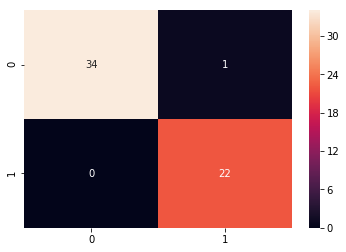

In [104]:
seabornInstance.heatmap(cm,annot=True)
#Malignant:1, Benign:0